In [ ]:
import Launch_simu as ls
import numpy as np
import matplotlib.pyplot as plt

: 

In [34]:
maxPktPerHour  = 400
stepPktPerHour = 20
Nnodes = np.array([250])
simulationTime = 3600
periodSenderUnique = 100
runs = 20

pktPerHour   = np.arange(1, maxPktPerHour, step= stepPktPerHour, dtype='float')
periodSender = 3600/pktPerHour
params = {
    'nDevices': [250],
    'simulationTime': [simulationTime],#♣[round(i, 4) for i in periodSender],
    'radius': [6250],
    'appPeriod': [periodSender], #lambda p: ["aloha"] if p["radius"] == 0 else ["goursaud"],
    'logProfile': [1],
    'packetSize': [50],
    'maxReceptionPaths': [50],
}

Result_FileName = 'Test'
script = ['LoRaTest','aloha-throughput']



In [19]:
print(3600/maxPktPerHour)

9.0


In [36]:
get_AllRun=True
ls.launch_simu(script[0], 
            params, 
            Result_FileName, 
            15,
            runs=runs, 
            optimized= True,
            show_progess=True,
            get_AllRun=get_AllRun,
            )


The script for the simulation is : /home/polmaistriaux/ns-3-dev/build/optimized/src/lorawan/examples/ns3.35-LoRaTest-optimized


Running sim.: 100%|██████████| 400/400 [02:44<00:00,  2.43sim./s]


(1, 1, 1, 20, 1, 1, 1, 20, 15)
(20,)


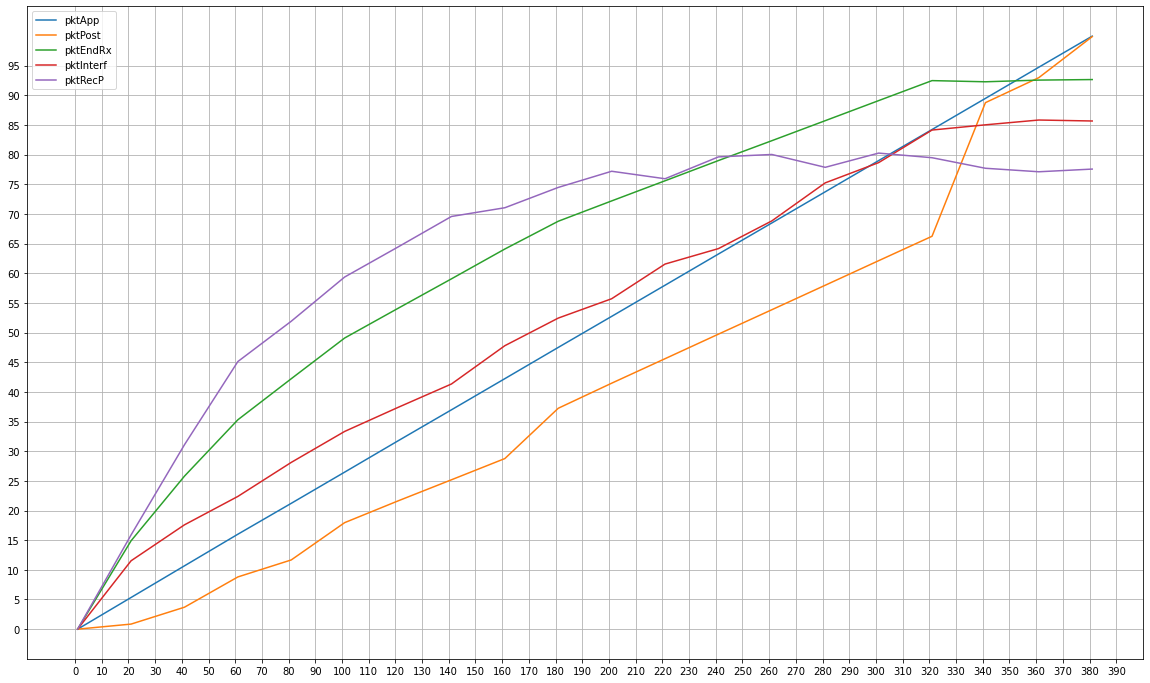

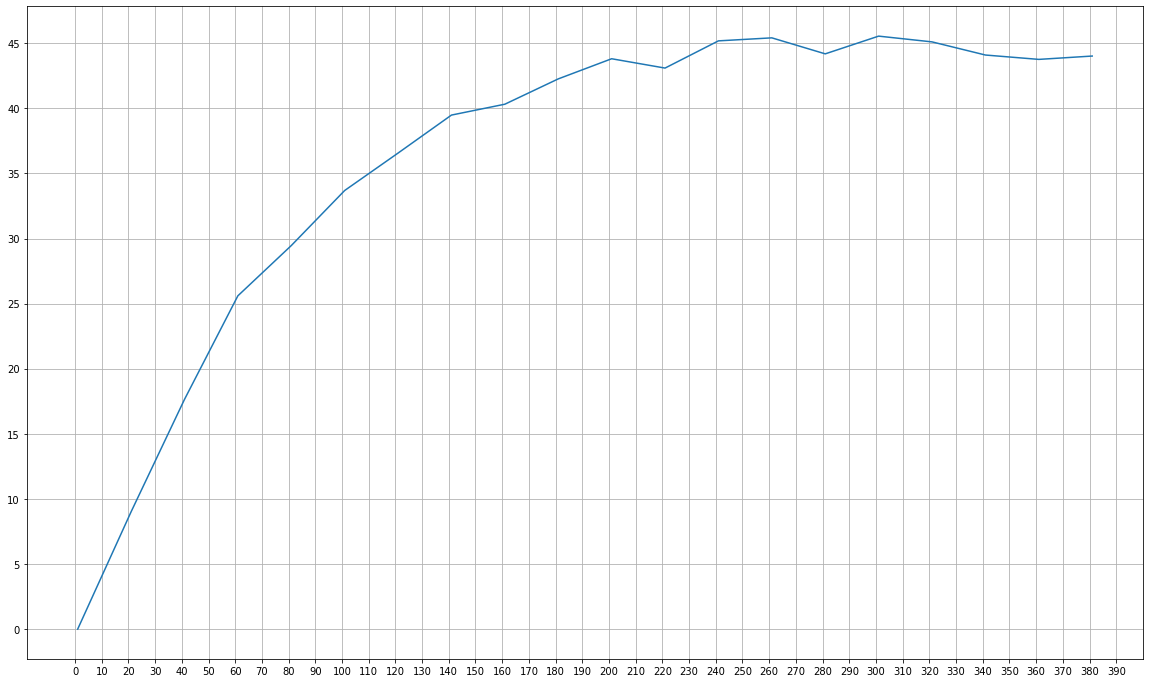

In [37]:
params_values, Results = ls.get_Results(params,Result_FileName,get_AllRun=get_AllRun)
print(np.shape(Results))
if get_AllRun : 
    pktApp     = np.mean(Results[0,0,0,:,0,0,0,:,0],axis=1) 
    print(np.shape(pktApp))
    pktPost    = np.mean(Results[0,0,0,:,0,0,0,:,1],axis=1)
    pktDuty    = np.mean(Results[0,0,0,:,0,0,0,:,2],axis=1)
    pktSentM   = np.mean(Results[0,0,0,:,0,0,0,:,3],axis=1)
    pktSentP   = np.mean(Results[0,0,0,:,0,0,0,:,4],axis=1)
    pktWrongF  = np.mean(Results[0,0,0,:,0,0,0,:,5],axis=1)
    pktWrongSF = np.mean(Results[0,0,0,:,0,0,0,:,6],axis=1)
    pktBegRx   = np.mean(Results[0,0,0,:,0,0,0,:,7],axis=1)
    pktIsTx    = np.mean(Results[0,0,0,:,0,0,0,:,8],axis=1)
    pktUnder   = np.mean(Results[0,0,0,:,0,0,0,:,9],axis=1)
    pktNoDemod = np.mean(Results[0,0,0,:,0,0,0,:,10],axis=1)
    pktEndRx   = np.mean(Results[0,0,0,:,0,0,0,:,11],axis=1)
    pktInterf  = np.mean(Results[0,0,0,:,0,0,0,:,12],axis=1)
    pktRecP    = np.mean(Results[0,0,0,:,0,0,0,:,13],axis=1)
    pktRecM    = np.mean(Results[0,0,0,:,0,0,0,:,14],axis=1)
else:
    pktApp     = Results[0,0,0,:,0,0,0,0]
    pktPost    = Results[0,0,0,:,0,0,0,1]
    pktDuty    = Results[0,0,0,:,0,0,0,2]
    pktSentM   = Results[0,0,0,:,0,0,0,3]
    pktSentP   = Results[0,0,0,:,0,0,0,4]
    pktWrongF  = Results[0,0,0,:,0,0,0,5]
    pktWrongSF = Results[0,0,0,:,0,0,0,6]
    pktBegRx   = Results[0,0,0,:,0,0,0,7]
    pktIsTx    = Results[0,0,0,:,0,0,0,8]
    pktUnder   = Results[0,0,0,:,0,0,0,9]
    pktNoDemod = Results[0,0,0,:,0,0,0,10]
    pktEndRx   = Results[0,0,0,:,0,0,0,11]
    pktInterf  = Results[0,0,0,:,0,0,0,12]
    pktRecP    = Results[0,0,0,:,0,0,0,13]
    pktRecM    = Results[0,0,0,:,0,0,0,14]



labelList = ["pktApp", "pktPost", "pktDuty", "pktSentM", "pktSentP", "pktWrongF", "pktWrongSF", "pktBegRx", "pktIsTx", "pktUnder", "pktNoDemod", "pktEndRx", "pktInterf", "pktRecP", "pktRecM"]
toPlot    = [1       ,  1       ,  0       , 0         , 0         ,  0         ,  0          ,  0        ,  0        , 0        , 0           , 1           , 1          , 1        , 0        ]

'''print()
plt.figure(figsize=(10,12))
#plt.yticks(np.arange(0, 95, 5)) 
plt.xticks(np.arange(0, maxPktPerHour, maxPktPerHour//20))
plt.title("Pkt received vs #pkt generated")
plt.xlabel("Num. generated packets/hour per node")
plt.ylabel("Num. received packets/hour per node")
for q in range(len(Nnodes)):
    #plt.plot(pktPerHour,pktPerHour/10 * pktRec[q,:]/Nnodes[q], label = str(Nnodes[q])+" nodes")
    plt.plot(pktPerHour,pktRec[q,:]/Nnodes[q], label = str(Nnodes[q])+" nodes")
plt.grid()
plt.legend()
#plt.plot(pktPerHour,pktInterf/Nnodes)
plt.show()

derivate = np.gradient(pktDuty, axis = 1)
derivate = 100*derivate/ np.max(derivate)'''

plt.figure(figsize=(20,12))
#plt.plot(pktPerHour,derivate[0,:])
for i in range (len(labelList)):
    if toPlot[i] == 1:
        max = np.max(Results[0,0,0,:,0,0,0,:,i]) 
        plt.plot(pktPerHour,100*np.mean(Results[0,0,0,:,0,0,0,:,i],axis = 1)/(max+(max==0))      , label = labelList[i])
        if max == 0:
            print(labelList[i] + " is equal to zero")


plt.yticks(np.arange(0, 100, 5)) 
plt.xticks(np.arange(0, maxPktPerHour, 10))
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(20,12))
plt.plot(pktPerHour,pktRecP/(250) )
plt.plot(pktPerHour,pktEndRx/(250) )
plt.yticks(np.arange(0, np.max(pktRecP/(250)), 5)) 
plt.xticks(np.arange(0, maxPktPerHour, 10))
plt.grid()
plt.show()



In [4]:
params_values, Results = ls.get_Results(params,Result_FileName,get_AllRun=get_AllRun)
print(np.shape(Results))
if get_AllRun : 
    pktApp     = np.mean(Results[:,0,0,:,0,0,0,:,0],axis=2)
    pktDuty    = np.mean(Results[:,0,0,:,0,0,0,:,1],axis=2)
    pktSent    = np.mean(Results[:,0,0,:,0,0,0,:,2],axis=2)
    pktNoDemod = np.mean(Results[:,0,0,:,0,0,0,:,3],axis=2)
    pktInterf  = np.mean(Results[:,0,0,:,0,0,0,:,4],axis=2)
    pktRec     = np.mean(Results[:,0,0,:,0,0,0,:,5],axis=2)
else:
    pktApp     = Results[0,0,0,:,0,0,0,0]
    pktDuty    = Results[0,0,0,:,0,0,0,1]
    pktSent    = Results[0,0,0,:,0,0,0,2]
    pktNoDemod = Results[0,0,0,:,0,0,0,3]
    pktInterf  = Results[0,0,0,:,0,0,0,4]
    pktRec     = Results[0,0,0,:,0,0,0,5]


print()
plt.figure(figsize=(10,12))
#plt.yticks(np.arange(0, 95, 5)) 
plt.xticks(np.arange(0, maxPktPerHour, maxPktPerHour//20))
plt.title("Pkt received vs #pkt generated")
plt.xlabel("Num. generated packets/hour per node")
plt.ylabel("Num. received packets/hour per node")
for q in range(len(Nnodes)):
    #plt.plot(pktPerHour,pktPerHour/10 * pktRec[q,:]/Nnodes[q], label = str(Nnodes[q])+" nodes")
    plt.plot(pktPerHour,pktRec[q,:]/Nnodes[q], label = str(Nnodes[q])+" nodes")
plt.grid()
plt.legend()
#plt.plot(pktPerHour,pktInterf/Nnodes)
plt.show()

derivate = np.gradient(pktDuty, axis = 1)
derivate = 100*derivate/ np.max(derivate)
plt.figure(figsize=(20,12))
plt.plot(pktPerHour,derivate[0,:])
plt.plot(pktPerHour,100*pktDuty[0,:]/ np.max(pktDuty[0,:])      , label = "pktDuty ")
plt.plot(pktPerHour,100*pktApp[0,:]/ np.max(pktApp[0,:])        , label = "pktApp ")
plt.plot(pktPerHour,100*pktSent[0,:]/ np.max(pktDuty[0,:])      , label = "pktSent ")
plt.plot(pktPerHour,100*pktNoDemod[0,:]/ np.max(pktNoDemod[0,:]), label = "pktNoDemod ")
plt.plot(pktPerHour,100*pktInterf[0,:]/ np.max(pktInterf[0,:])  , label = "pktInterf ")
plt.plot(pktPerHour,100*pktRec[0,:]/ np.max(pktRec[0,:])        , label = "pktRec ")
plt.yticks(np.arange(0, 100, 5)) 
plt.xticks(np.arange(0, maxPktPerHour, 10))
plt.legend()
plt.grid()
plt.show()


NameError: name 'get_AllRun' is not defined

In [35]:
params_values, Results = ls.get_Results(params,"Test_Success",get_AllRun=get_AllRun)
print(np.shape(Results))
if get_AllRun : 
    pktApp     = np.mean(Results[:,0,0,:,0,0,0,:,0],axis=2)
    pktDuty    = np.mean(Results[:,0,0,:,0,0,0,:,1],axis=2)
    pktSent    = np.mean(Results[:,0,0,:,0,0,0,:,2],axis=2)
    pktNoDemod = np.mean(Results[:,0,0,:,0,0,0,:,3],axis=2)
    pktInterf  = np.mean(Results[:,0,0,:,0,0,0,:,4],axis=2)
    pktRec     = np.mean(Results[:,0,0,:,0,0,0,:,5],axis=2)
else:
    pktApp     = Results[0,0,0,:,0,0,0,0]
    pktDuty    = Results[0,0,0,:,0,0,0,1]
    pktSent    = Results[0,0,0,:,0,0,0,2]
    pktNoDemod = Results[0,0,0,:,0,0,0,3]
    pktInterf  = Results[0,0,0,:,0,0,0,4]
    pktRec     = Results[0,0,0,:,0,0,0,5]

print()
plt.figure(figsize=(10,12))
plt.yticks(np.arange(0, np.max(pktRec/Nnodes[:,np.newaxis]), 5)) 
plt.xticks(np.arange(0, maxPktPerHour, maxPktPerHour//20))
plt.title("Pkt received vs #pkt generated")
plt.xlabel("Num. generated packets/hour per node")
plt.ylabel("Num. received packets/hour per node")
for q in range(len(Nnodes)):
    plt.plot(pktPerHour,pktRec[q,:]/Nnodes[q], label = str(Nnodes[q])+" nodes")
plt.grid()
#plt.plot(pktPerHour,pktInterf/Nnodes)
plt.show()

print("Repartition of nodes packet over different SF")

ValueError: cannot reshape array of size 24000 into shape (2,1,1,60,1,1,1,50,6)

In [28]:
params_values, Results = ls.get_Results(params,Result_FileName,get_AllRun=get_AllRun)
print(np.shape(Results))
if get_AllRun : 
    pktApp     = np.mean(Results[0,0,0,:,0,0,0,:,0],axis=1)
    pktDuty    = np.mean(Results[0,0,0,:,0,0,0,:,1],axis=1)
    pktSent    = np.mean(Results[0,0,0,:,0,0,0,:,2],axis=1)
    pktNoDemod = np.mean(Results[0,0,0,:,0,0,0,:,3],axis=1)
    pktInterf  = np.mean(Results[0,0,0,:,0,0,0,:,4],axis=1)
    pktRec     = np.mean(Results[0,0,0,:,0,0,0,:,5],axis=1)
else:
    pktApp     = Results[0,0,0,:,0,0,0,0]
    pktDuty    = Results[0,0,0,:,0,0,0,1]
    pktSent    = Results[0,0,0,:,0,0,0,2]
    pktNoDemod = Results[0,0,0,:,0,0,0,3]
    pktInterf  = Results[0,0,0,:,0,0,0,4]
    pktRec     = Results[0,0,0,:,0,0,0,5]


plt.plot(pktPerHour,pktRec/Nnodes)
#plt.plot(pktPerHour,pktInterf/Nnodes)
plt.show()

print("Repartition of nodes packet over different SF")

ValueError: cannot reshape array of size 2250 into shape (3,1,1,25,1,1,1,6)

In [81]:
params_values, Results = ls.get_Results(params,Result_FileName,get_AllRun=get_AllRun)
print(np.shape(Results))
if get_AllRun : 
    SFsent     = np.mean(Results[0,0,0,:,:, ::4],axis=1)
    SFreceived = np.mean(Results[0,0,0,:,:,1::4],axis=1)
    SFinterf   = np.mean(Results[0,0,0,:,:,2::4],axis=1)
    SFunderSen = np.mean(Results[0,0,0,:,:,3::4],axis=1)
else:
    SFsent     = Results[0,0,0,:, ::4]
    SFreceived = Results[0,0,0,:,1::4]
    SFinterf   = Results[0,0,0,:,2::4]
    SFunderSen = Results[0,0,0,:,2::4]

print("Repartition of nodes packet over different SF")
print(np.array_str(np.sum(SFsent, axis = 0)/SFsent.sum() , precision=2))

[1, 1, 1, 50, 50, 24]
(2500, 24)
(1, 1, 1, 50, 50, 24)
Repartition of nodes packet over different SF
[0.15 0.07 0.1  0.14 0.13 0.41]


[   666.   3996.   7326.  10656.  13986.  17316.  20646.  23976.  27306.
  30636.  33966.  37296.  40626.  43956.  47286.  50616.  53946.  57276.
  60606.  63936.  67266.  70596.  73926.  77256.  80586.  83916.  87246.
  90576.  93906.  97236. 100566. 103896. 107226. 110556. 113886. 117216.
 120546. 123876. 127206. 130536. 133866. 137196. 140526. 143856. 147186.
 150516. 153846. 157176. 160506. 163836.]
[489.16 995.34 953.68 953.22 891.38 854.2  864.56 770.96 799.22 779.96
 762.98 674.   692.02 642.94 560.82 579.06 617.06 582.82 534.94 530.6
 542.46 406.2  426.4  534.06 558.1  431.38 439.7  363.76 380.2  397.86
 343.36 436.8  382.66 423.38 357.82 370.52 311.06 375.4  301.24 280.22
 343.68 333.3  293.82 334.4  355.8  318.   317.06 239.04 293.96 310.72]
[  36.4   539.02  883.98 1067.2  1195.86 1276.36 1360.64 1432.92 1472.42
 1534.74 1565.1  1577.94 1674.06 1741.32 1765.36 1806.7  1781.72 1847.82
 1875.   1898.34 1880.58 1975.18 1947.26 1956.78 1995.94 2039.06 2114.64
 1995.42 1937.84 20

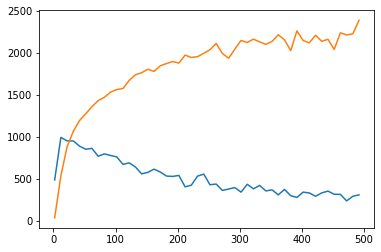

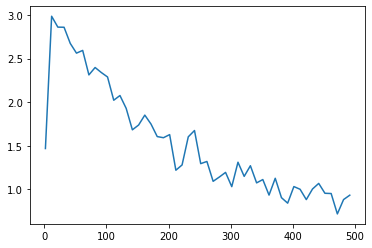

In [83]:
sent       = np.sum(SFsent,axis = 1)
received   = np.sum(SFreceived,axis = 1)
interf     = np.sum(SFinterf,axis = 1)
underSen   = np.sum(SFunderSen,axis = 1)
print(sent)
print(received)
print(interf)
print(3600/simulationTime * sent/Nnodes)
print(3600/simulationTime * received/Nnodes)
plt.plot(pktPerHour,received)
plt.plot(pktPerHour,interf)
plt.show()

plt.plot(3600/simulationTime * sent/Nnodes,3600/simulationTime * received/Nnodes )
plt.show()

In [ ]:
sent       = np.sum(np.mean(Results[0,0,0,:,:, ::4],axis = 1), axis = 1)
print(sent)
received   = np.sum(np.mean(Results[0,0,0,:,:,1::4],axis = 1), axis = 1)
print(received)
interf     = np.sum(np.mean(Results[0,0,0,:,:,2::4],axis = 1), axis = 1)
print(interf)
underSen   = np.sum(np.mean(Results[0,0,0,:,:,3::4],axis = 1), axis = 1)
print(underSen)

plt.plot(3600/simulationTime * sent/Nnodes,3600/simulationTime * received/Nnodes )
plt.show()

(1, 100, 1, 1, 50, 12)


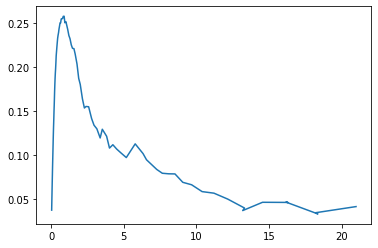

In [8]:
'''
Get simualtions results for the aloha test of the initial LoRaWAN git

'''
print(np.shape(Results))
durationsU = [112896, 205312, 369664, 657408, 1478656, 2629632]
durations  = durations = [float(i)/1e6 for i in durationsU]
sent       = np.mean(Results[0,:,0,0,:, ::2],axis=1)
received   = np.mean(Results[0,:,0,0,:,1::2],axis=1)

current_g = np.divide(sent * durations ,np.transpose(np.array([params_values[1]])))
summed_g = np.sum(current_g,axis=1)
current_s = np.divide(current_g * received ,sent)
summed_s = np.sum(current_s,axis=1)



plt.plot(summed_g, summed_s )

plt.show()